In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("graph_norm.csv", index_col=0)
pubchem = pd.read_csv("pubchem.csv", index_col=0)
gea = pd.read_csv("gea.csv", index_col=0)

/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_73242/851024714.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name)
/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_73242/851024714.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="drug", y="Term", data=gea.assign(color=colors), palette=colors, dodge=False, ax=ax2)


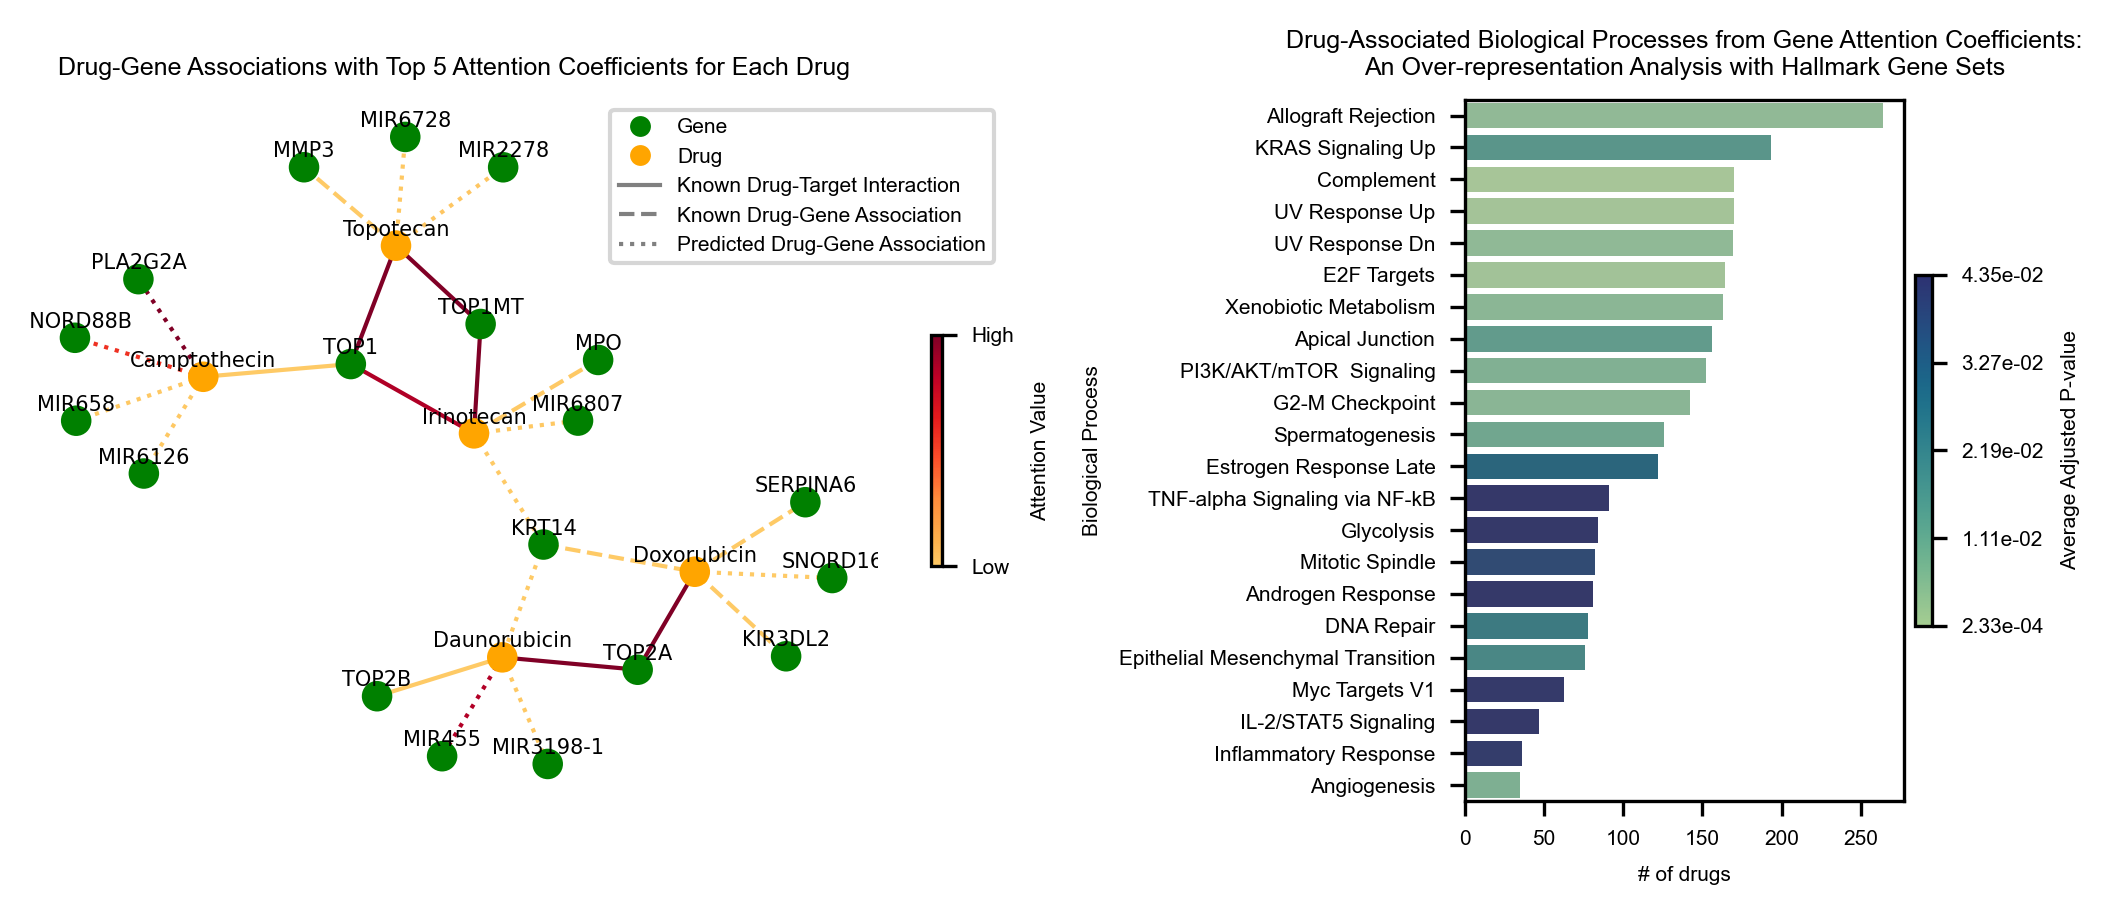

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.size"] = 5

# Create a figure with two subplots side by side, with the left subplot wider
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(7, 3), dpi=300, gridspec_kw={"width_ratios": [2, 1]}
)

# First plot (Network graph)
G = nx.from_pandas_edgelist(df, "genes", "name", ["Attention", "dtis"])
pos_kk = nx.kamada_kawai_layout(G)
genes = set(df["genes"])
drugs = set(df["name"])
node_colors = ["green" if node in genes else "orange" for node in G.nodes()]
label_pos = {key: [value[0], value[1] + 0.05] for key, value in pos_kk.items()}
edges, weights = zip(*nx.get_edge_attributes(G, "Attention").items())
edges_dtis, dtis_values = zip(*nx.get_edge_attributes(G, "dtis").items())

cmap = plt.cm.YlOrRd
cmap_modified = cmap(np.linspace(0.3, 1.0, 256))
cmap_modified = plt.cm.colors.ListedColormap(cmap_modified)
norm = plt.Normalize(0, max(weights))

nx.draw_networkx_nodes(G, pos_kk, node_color=node_colors, node_size=40, ax=ax1)

for edge, weight, dtis in zip(edges, weights, dtis_values):
    try:
        tmp = pubchem.loc[edge[0], edge[1]]
    except:
        tmp = pubchem.loc[edge[1], edge[0]]
    if dtis == 1:
        style = "solid"
    elif tmp > 0:
        style = "--"
    else:
        style = ":"
    nx.draw_networkx_edges(
        G,
        pos_kk,
        edgelist=[edge],
        width=1,
        edge_color=cmap_modified(norm(weight)),
        style=style,
        ax=ax1,
    )

nx.draw_networkx_labels(G, label_pos, font_size=5, ax=ax1)

sm = plt.cm.ScalarMappable(cmap=cmap_modified, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, shrink=0.33, ticks=[])
cbar.set_label("Attention Value")
cbar.set_ticks([norm(0), norm(max(weights))])
cbar.set_ticklabels(["Low", "High"])

green_patch = plt.Line2D(
    [0], [0], marker="o", color="w", markerfacecolor="green", markersize=6, label="Gene"
)
orange_patch = plt.Line2D(
    [0],
    [0],
    marker="o",
    color="w",
    markerfacecolor="orange",
    markersize=6,
    label="Drug",
)

ax1.legend(
    handles=[
        green_patch,
        orange_patch,
        plt.Line2D(
            [0], [0], color="gray", lw=1, ls="-", label="Known Drug-Target Interaction"
        ),
        plt.Line2D(
            [0], [0], color="gray", lw=1, ls="--", label="Known Drug-Gene Association"
        ),
        plt.Line2D(
            [0],
            [0],
            color="gray",
            lw=1,
            ls=":",
            label="Predicted Drug-Gene Association",
        ),
    ],
    loc="upper right",
    bbox_to_anchor=(1.15, 1),
)

ax1.axis("off")
ax1.set_title("Drug-Gene Associations with Top 5 Attention Coefficients for Each Drug")

# Second plot (Barplot)
cmap_name = "crest"
cmap = plt.cm.get_cmap(cmap_name)

data = list(gea["Adjusted P-value"])
vmin = np.min(data)
vmax = np.max(data)
norm = plt.Normalize(vmin=vmin, vmax=vmax)
colors = [cmap(norm(value)) for value in data]

sns.barplot(
    x="drug",
    y="Term",
    data=gea.assign(color=colors),
    palette=colors,
    dodge=False,
    ax=ax2,
)

ax2.tick_params(axis="x")
ax2.tick_params(axis="y")
ax2.set_ylabel("Biological Process")
ax2.set_xlabel("# of drugs")
ax2.set_title(
    "Drug-Associated Biological Processes from Gene Attention Coefficients:\nAn Over-representation Analysis with Hallmark Gene Sets"
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax2, shrink=0.5, pad=0.02)
cbar.set_label("Average Adjusted P-value")
cbar.set_ticks(np.linspace(vmin, vmax, num=5))
cbar.set_ticklabels([f"{t:.2e}" for t in np.linspace(vmin, vmax, num=5)])
# cbar.ax.tick_params(labelsize=4)

plt.tight_layout()
plt.savefig("fig4.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

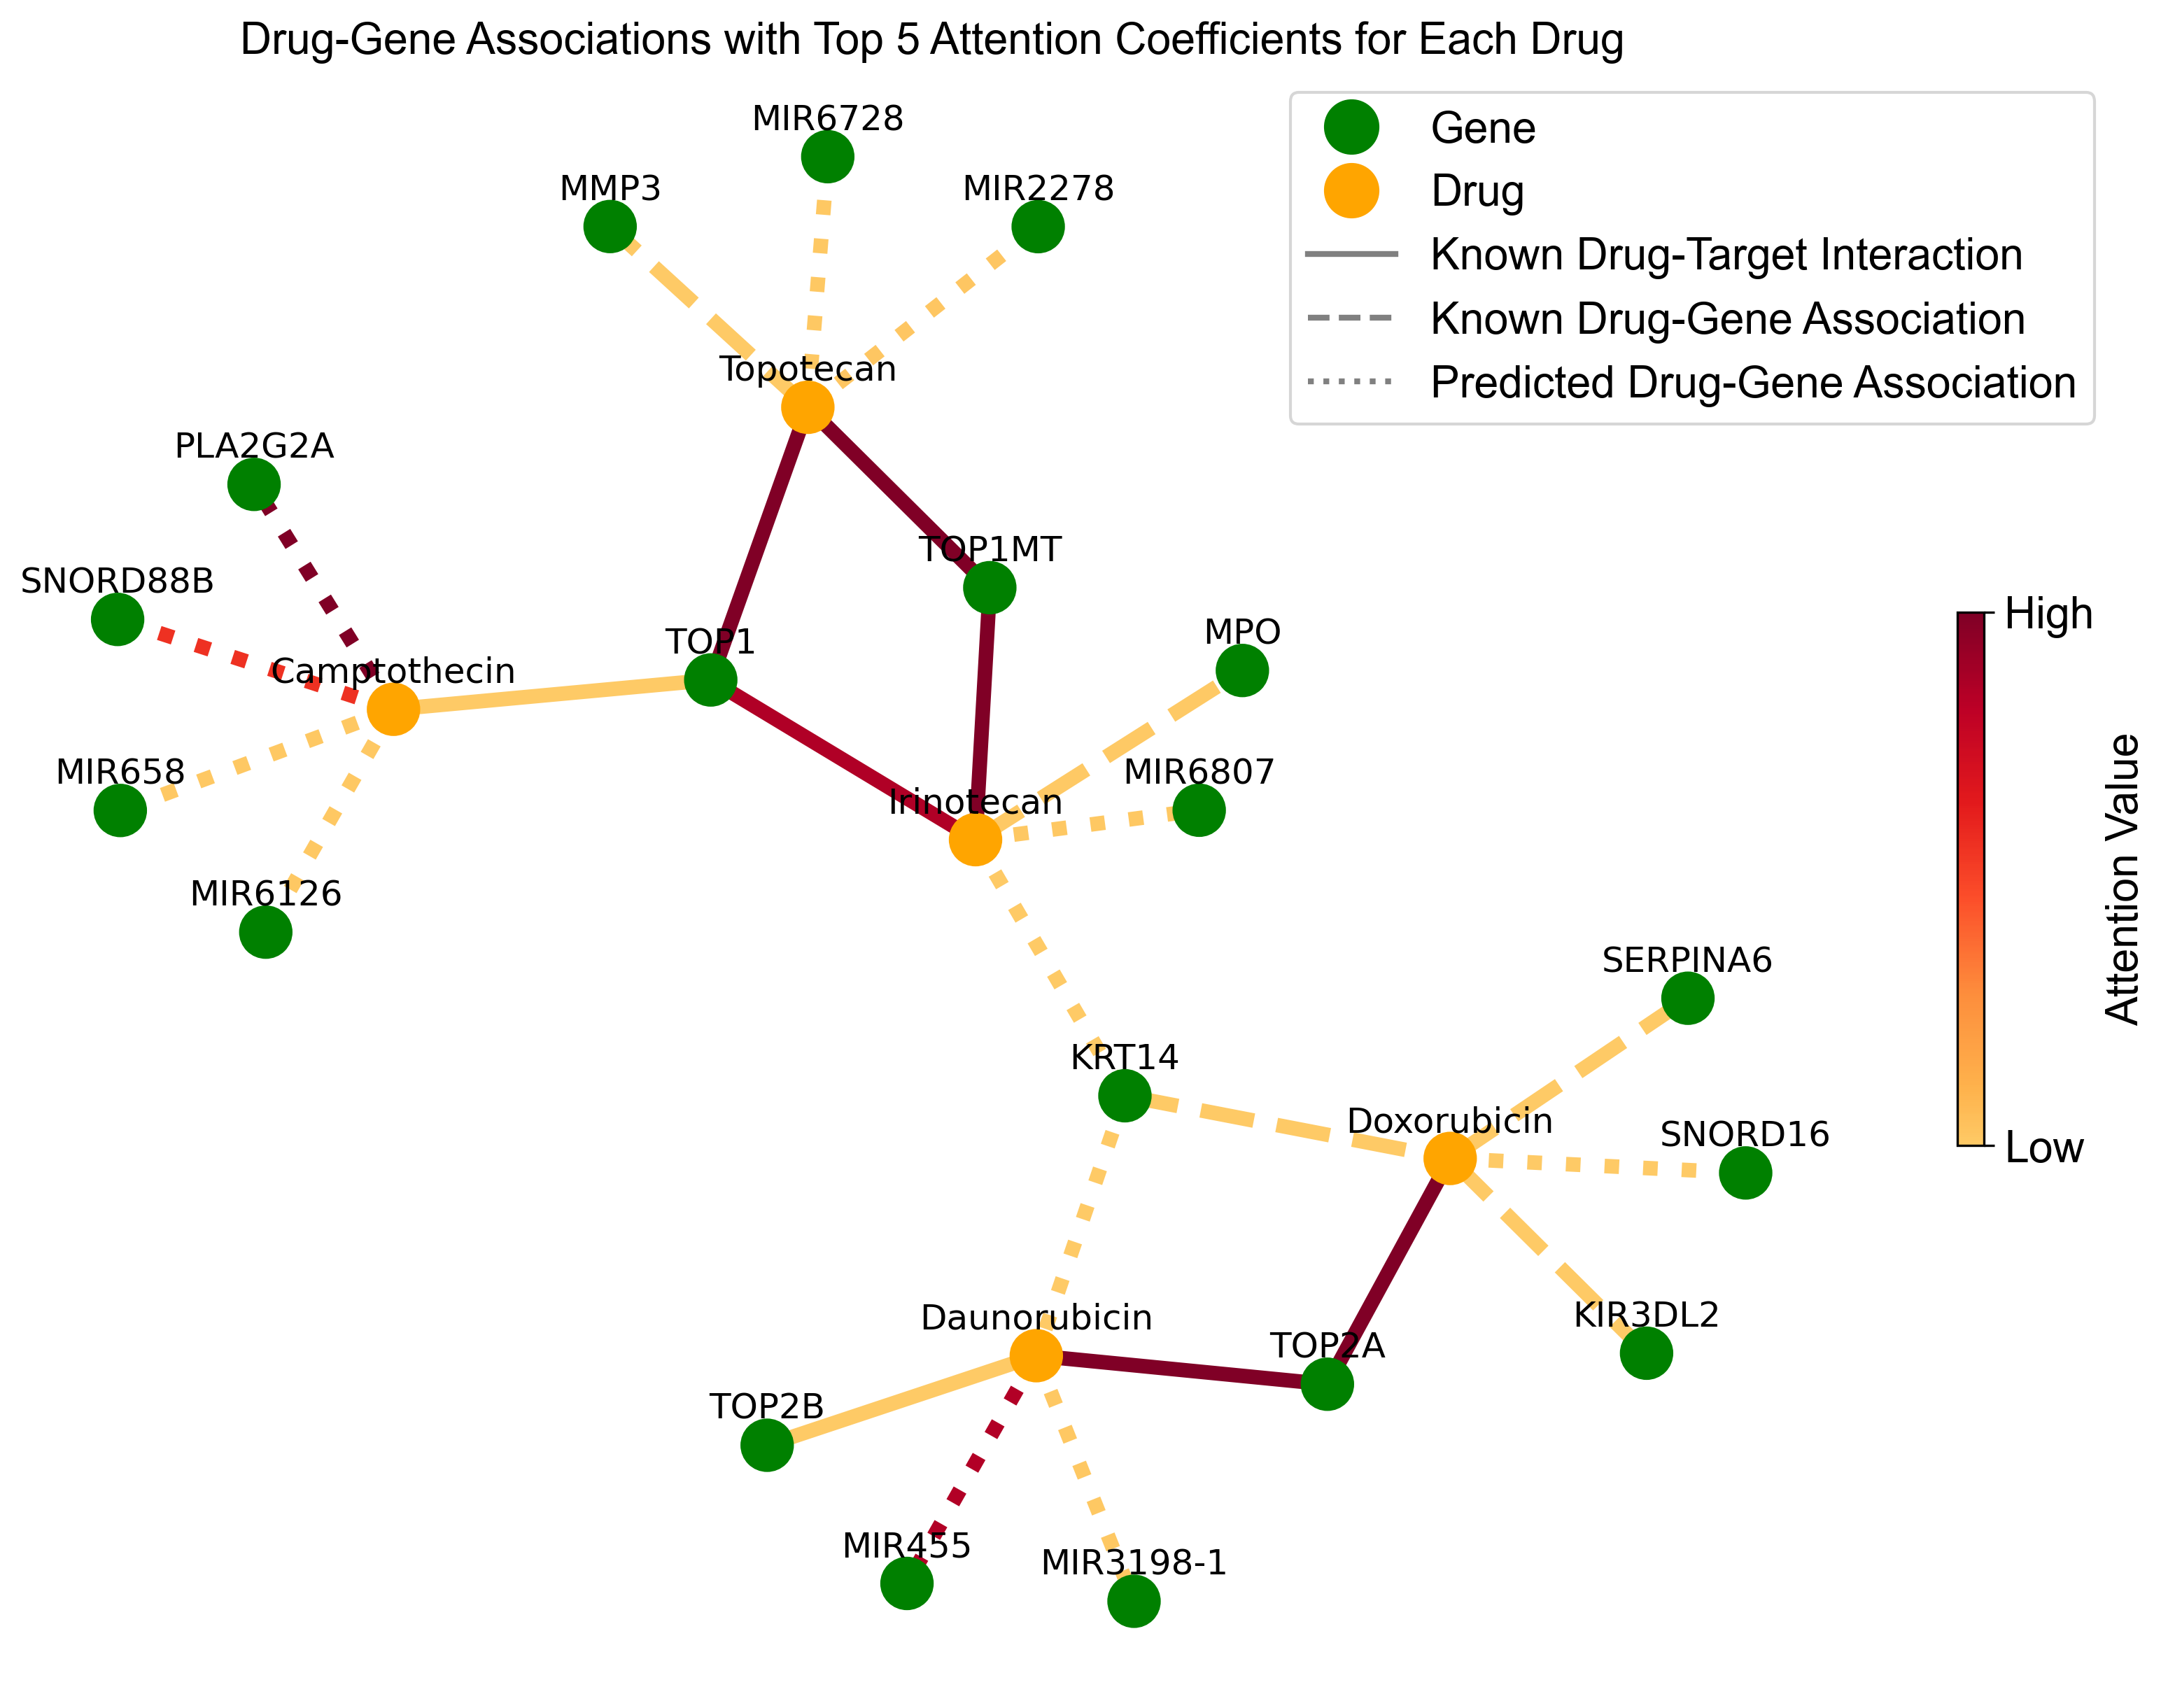

In [5]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.size"] = 10

G = nx.from_pandas_edgelist(df, "genes", "name", ["Attention", "dtis"])

# Kamada-Kawai layout for node positioning
pos_kk = nx.kamada_kawai_layout(G)

# Node colors: green for genes, orange for drugs
genes = set(df["genes"])
drugs = set(df["name"])
node_colors = ["green" if node in genes else "orange" for node in G.nodes()]

# Adjust label positions for clarity
label_pos = {key: [value[0], value[1] + 0.05] for key, value in pos_kk.items()}

# Drawing the graph with attention values mapped to colors using a colormap
edges, weights = zip(*nx.get_edge_attributes(G, "Attention").items())
edges_dtis, dtis_values = zip(*nx.get_edge_attributes(G, "dtis").items())

# Creating a color map based on the Attention values
cmap = plt.cm.YlOrRd
cmap_modified = cmap(
    np.linspace(0.3, 1.0, 256)
)  # Start from 30% to remove the lightest colors
cmap_modified = plt.cm.colors.ListedColormap(cmap_modified)

# Normalize Attention values for colormap
norm = plt.Normalize(0, max(weights))

fig, ax = plt.subplots(figsize=(14, 10), dpi=300)

# Draw nodes
nx.draw_networkx_nodes(G, pos_kk, node_color=node_colors, node_size=300, ax=ax)

# Draw edges
for edge, weight, dtis in zip(edges, weights, dtis_values):
    try:
        tmp = pubchem.loc[edge[0], edge[1]]
    except:
        tmp = pubchem.loc[edge[1], edge[0]]
    if dtis == 1:
        style = "solid"
    elif tmp > 0:
        style = "--"
    else:
        style = ":"
    nx.draw_networkx_edges(
        G,
        pos_kk,
        edgelist=[edge],
        width=5,
        edge_color=cmap_modified(norm(weight)),
        style=style,
        ax=ax,
    )

# Draw labels
nx.draw_networkx_labels(G, label_pos, font_size=12, ax=ax)

# Create colorbar as legend for Attention values
sm = plt.cm.ScalarMappable(cmap=cmap_modified, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.33, ticks=[])
cbar.set_label("Attention Value", fontsize=15)
cbar.set_ticks([norm(0), norm(max(weights))])  # 最小値と最大値の位置にティックを設定
cbar.set_ticklabels(["Low", "High"])
cbar.ax.tick_params(labelsize=15)

# Legend for node colors
green_patch = plt.Line2D(
    [0],
    [0],
    marker="o",
    color="w",
    markerfacecolor="green",
    markersize=20,
    label="Gene",
)
orange_patch = plt.Line2D(
    [0],
    [0],
    marker="o",
    color="w",
    markerfacecolor="orange",
    markersize=20,
    label="Drug",
)

plt.legend(
    handles=[
        green_patch,
        orange_patch,
        plt.Line2D(
            [0], [0], color="gray", lw=2, ls="-", label="Known Drug-Target Interaction"
        ),
        plt.Line2D(
            [0], [0], color="gray", lw=2, ls="--", label="Known Drug-Gene Association"
        ),
        plt.Line2D(
            [0],
            [0],
            color="gray",
            lw=2,
            ls=":",
            label="Predicted Drug-Gene Association",
        ),
    ],
    loc="upper right",
    fontsize=15,
    bbox_to_anchor=(1.15, 1),
)

# know drug-target interaction, known drug-gene relationship, predicted drug-gene association

plt.axis("off")
plt.title(
    "Drug-Gene Associations with Top 5 Attention Coefficients for Each Drug",
    fontsize=15,
)
plt.show()

/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_73242/2416577687.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name)
/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_73242/2416577687.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


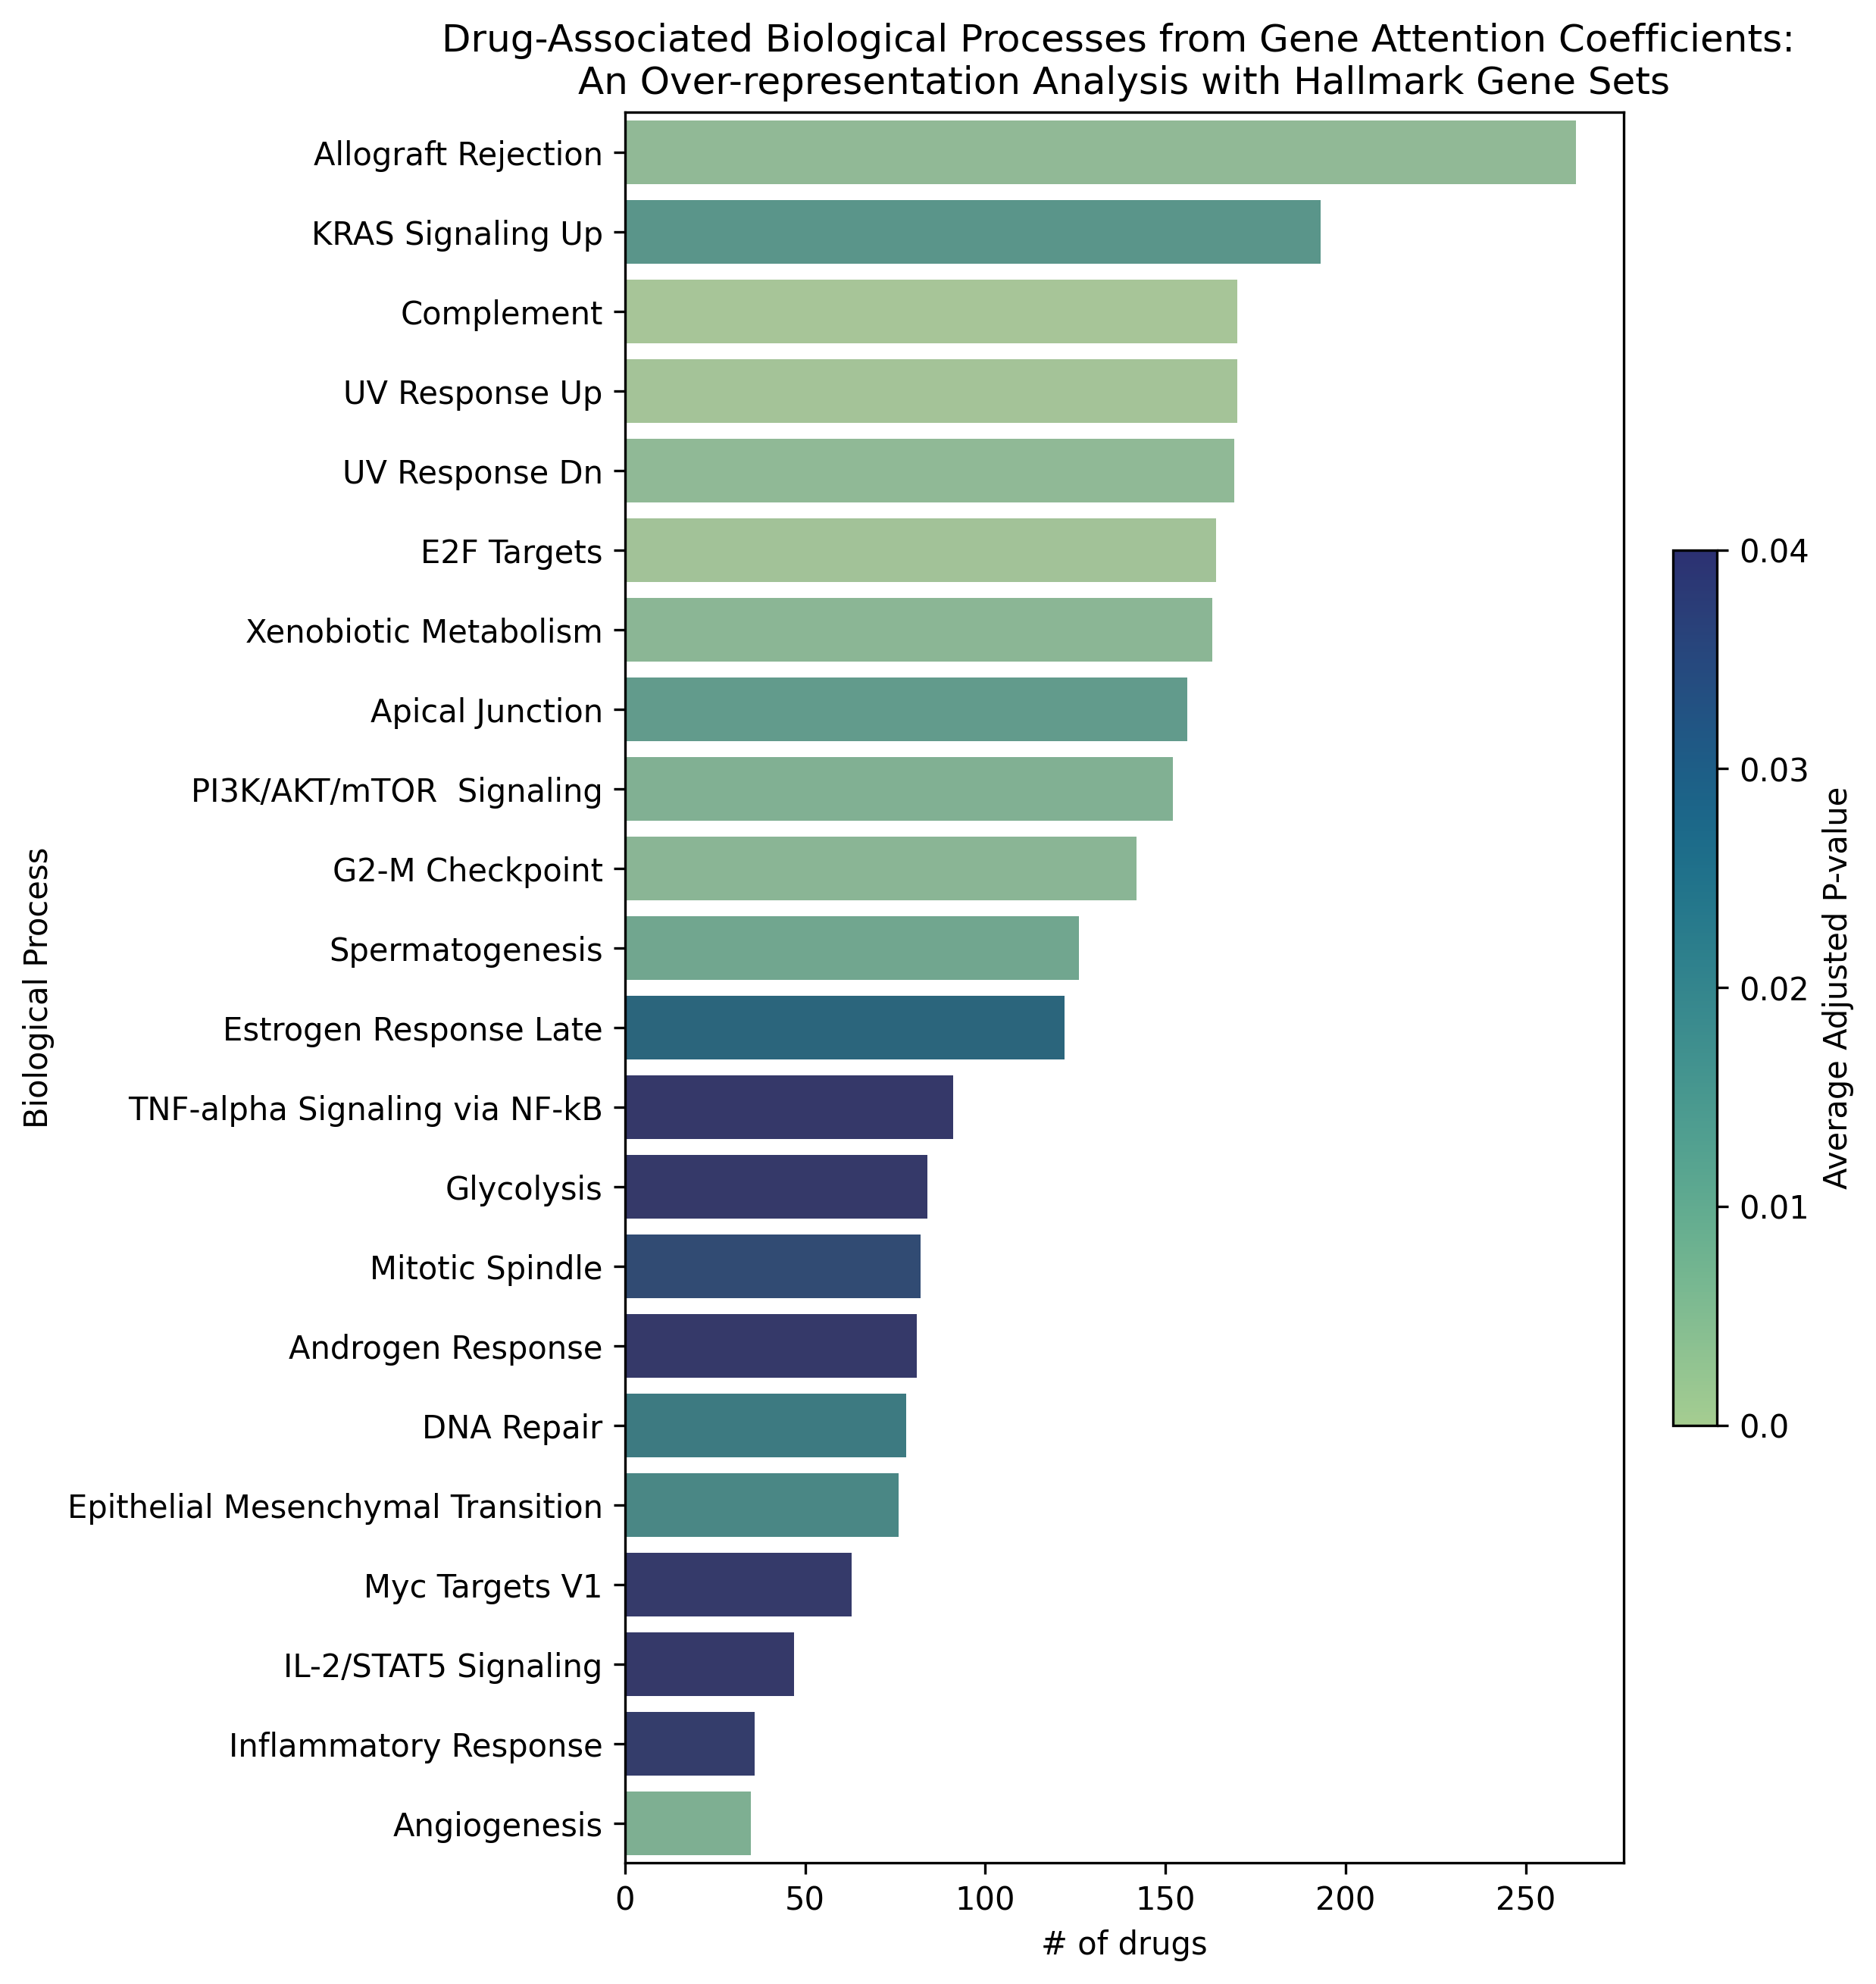

In [6]:
# plt.figure(figsize=(14, 18), dpi=300)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.size"] = 10

cmap_name = "crest"
cmap = plt.cm.get_cmap(cmap_name)

plt.rcdefaults()

data = list(gea["Adjusted P-value"])

vmin = np.min(data)
vmax = np.max(data)

norm = plt.Normalize(vmin=vmin, vmax=vmax)
colors = [cmap(norm(value)) for value in data]

# 明示的にfig, axを作成

fig, ax = plt.subplots(figsize=(7, 10), dpi=300)

sns.barplot(
    x="drug",
    y="Term",
    data=gea.assign(color=colors),  # ここで色の情報をデータフレームに追加
    palette=colors,  # そして、割り当てた色を利用
    dodge=False,
    ax=ax,  # 作成したaxオブジェクトを使用
)

# labelsize = 30
ax.tick_params(
    axis="x",
)  # x軸の目盛りフォントサイズ
ax.tick_params(
    axis="y",
)
ax.set_ylabel("Biological Process")
ax.set_xlabel("# of drugs")
ax.set_title(
    "Drug-Associated Biological Processes from Gene Attention Coefficients: \nAn Over-representation Analysis with Hallmark Gene Sets",
    #     fontsize=labelsize,  # フォントサイズを10からlabelsizeに統一
    #     x=-0.001,
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, shrink=0.5, pad=0.04)
cbar.set_label("Average Adjusted P-value")
cbar.set_ticks(np.linspace(vmin, vmax, num=5))  # numを変更して目盛りの数を調整
cbar.set_ticklabels(
    [round(t, 2) for t in np.linspace(vmin, vmax, num=5)]
)  # 科学的表記で目盛りラベルを設定
cbar.ax.tick_params()

plt.show()